In [94]:

import os, shutil, sys
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom
from PIL import Image
import cv2
import shutil
from skimage import exposure

In [95]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\Mojtaba Jafari Tadi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [96]:
#get working directory
os.getcwd()

'C:\\Users\\Mojtaba Jafari Tadi\\Projects_AMK\\Radiology Project'

In [97]:
os.listdir()

['Binary_Classification_ClaheHistEqInvSplit',
 'Binary_Classification_claheLBP',
 'Binary_Classification_ClaheSplit',
 'Binary_Classification_clhhisteqSplit',
 'Binary_Classification_clh_EFvsnEFSplit',
 'Binary_Classification_LateralSplit',
 'Binary_Classification_LBP',
 'Binary_Classification_newSplit',
 'Binary_Classification_Split',
 'checkpoint',
 'checkpoints',
 'checkpoints.data-00000-of-00001',
 'checkpoints.index',
 'data_DICOM',
 'DenseNet_model_030321.h5',
 'DenseNet_model_040321.h5',
 'DenseNet_model_050321.h5',
 'DenseNet_model_050321_auc.h5',
 'DenseNet_model_060321_auc.h5',
 'DenseNet_model_080321_acc.h5',
 'fatpad',
 'reformatted_binary',
 'reformatted_binary_clahe',
 'reformatted_binary_clahe_histeq',
 'reformatted_binary_LBP',
 'reformatted_binary_scaled',
 'reformatted_binary_unscaled',
 'reformatted_data',
 'reformatted_data_clahe',
 'reformatted_data_clahehisteqinv',
 'reformatted_data_LBP',
 'reformatted_data_unscaled',
 'Results',
 'xray_model.h5',
 'xray_model_11

In [98]:
#change working directory to where the datasets are
root_directory=os.chdir('C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project')

In [99]:
#Provide train, validation, and test ONLY EFFUSION DATASET
#base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/train'
#base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/validation'
#base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/test'

#print(base_dir_train)

In [100]:
#Provide train, validation, and test EFFUSION + FRACTURE on LATERAL SIDE
base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheHistEqInvSplit/train'
base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheHistEqInvSplit/validation'
base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheHistEqInvSplit/test'

print(base_dir_train)

C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheHistEqInvSplit/train


In [101]:
#Provide train, validation, and test EFFUSION + FRACTURE on LATERAL SIDE
base_dir_train_lbp = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/train'
base_dir_validate_lbp = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/validation'
base_dir_test_lbp = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/test'

print(base_dir_train)

C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_ClaheHistEqInvSplit/train


In [157]:
#run tensorflow-keras ImageDataGenerator on the directory which contains train, validate and test
#train_datagen = ImageDataGenerator(
 #   rescale=1./255, # new parameter (maps pixel values to floats)
 #   rotation_range=40,
 #   width_shift_range=0.2,
  ##  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.25,
  #  horizontal_flip=True,
  #  fill_mode='nearest') # Note: I added this, too

#def gray_to_rgb(img):
 #   return np.repeat(img, 3, 2)

IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1
IMAGE_SHAPE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
batch_size=16
epochs = 500
num_classes = 2

train_datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True, 
              samplewise_std_normalization=True, 
              horizontal_flip = True, 
              vertical_flip = False, 
              height_shift_range= 0.05, 
              width_shift_range=0.05, 
              rotation_range=35, 
              shear_range = 0.41,
              fill_mode = 'nearest',
              zoom_range=0.25)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_dir_train,
       shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        base_dir_validate, 
       target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode='rgb',
    shuffle=True)

test_generator = train_datagen.flow_from_directory(
        base_dir_test,
        target_size=IMAGE_SIZE,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode='rgb',
        shuffle=False)



Found 3094 images belonging to 2 classes.
Found 884 images belonging to 2 classes.
Found 443 images belonging to 2 classes.


In [158]:
#run tensorflow-keras ImageDataGenerator on the directory which contains train, validate and test
#train_datagen = ImageDataGenerator(
 #   rescale=1./255, # new parameter (maps pixel values to floats)
 #   rotation_range=40,
 #   width_shift_range=0.2,
  ##  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.25,
  #  horizontal_flip=True,
  #  fill_mode='nearest') # Note: I added this, too

#def gray_to_rgb(img):
 #   return np.repeat(img, 3, 2)

IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1
IMAGE_SHAPE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
batch_size=16
epochs = 500
num_classes = 2

train_datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True, 
              samplewise_std_normalization=True, 
              horizontal_flip = True, 
              vertical_flip = False, 
              height_shift_range= 0.05, 
              width_shift_range=0.05, 
              rotation_range=35, 
              shear_range = 0.41,
              fill_mode = 'nearest',
              zoom_range=0.25)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_lbp = train_datagen.flow_from_directory(
        base_dir_train_lbp,
       shuffle=False,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size)

validation_generator_lbp = test_datagen.flow_from_directory(
        base_dir_validate_lbp, 
       target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode='rgb',
    shuffle=False)

test_generator_lbp = train_datagen.flow_from_directory(
        base_dir_test_lbp,
        target_size=IMAGE_SIZE,
        batch_size=batch_size,
        class_mode="categorical",
        color_mode='rgb',
        shuffle=False)



Found 3094 images belonging to 2 classes.
Found 884 images belonging to 2 classes.
Found 443 images belonging to 2 classes.


In [159]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def plot_history(h):
    acc = h.history['acc']
    val_acc = h.history['val_acc']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(411)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='validation')
    # plot accuracy
    plt.subplot(412)
    plt.title('Classification Accuracy')
    plt.plot(history.history['binary_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_binary_accuracy'], color='orange', label='validation')
    
    plt.subplot(413)
    plt.title('Classification Precision')
    plt.plot(history.history['precision'], color='blue', label='train')
    plt.plot(history.history['val_precision'], color='orange', label='validation')
    
    plt.subplot(414)
    plt.title('Classification Recall')
    plt.plot(history.history['recall'], color='blue', label='train')
    plt.plot(history.history['val_recall'], color='orange', label='validation')
    # save plot to file
    plt.show()
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    #plt.close()


In [160]:
train_generator.image_shape


(224, 224, 3)

In [161]:
from matplotlib import pyplot
gr=0
if gr: 
    fig, axs = plt.subplots(4,4, figsize=(15, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(16):
        # define subplot
        # generate batch of images
        batch = train_generator.next()
        # convert to unsigned integers for viewing
        image = batch[0]
        # plot raw pixel data
        axs[i].imshow(image[i].reshape(200,200), cmap=pyplot.get_cmap('gray'))# show the figure

In [162]:
METRICS = [
    tensorflow.keras.metrics.BinaryAccuracy(),
    tensorflow.keras.metrics.Precision(name="precision"),
    tensorflow.keras.metrics.Recall(name="recall"),
]


In [163]:
initial_learning_rate = 1e-4
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [172]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
#from tensorflow.keras.applications import InceptionV3
from keras.applications import MobileNet,MobileNetV2
def MobnetTF(img_inputs=(224, 224, 3)):
    input_1 = keras.layers.Input(shape=img_inputs)
    input_2 = keras.layers.Input(shape=img_inputs)
    added = keras.layers.Concatenate(axis=-1)([input_1, input_2])
    #img_inputs = keras.Input(shape=(224, 224, 3))
    #merged_images = np.vstack([input_1, input_2])
    #base_model = keras.applications.MobileNetV2(input_tensor=inputs,weights="imagenet",  include_top=False)
    base_model = keras.applications.MobileNet(input_tensor=None, weights="imagenet",include_top=False)
    #x=base_model(added,training = False)
    for layer in base_model.layers:
        layer.trainable = False
    root_model = tensorflow.keras.Model(inputs=base_model.input, outputs=base_model.output)
    #base_model.summary()
    #model = models.Sequential()
    #model.add(base_model)
    #model.add(layers.BatchNormalization())
    #model.add(layers.GlobalAvgPool2D())
    #model.add(layers.Flatten())
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(128, activation="relu"))
    #model.add(layers.Dropout(0.5))
    #model.add(layers.Dense(2, activation="softmax", name="pred"))

    #x=squeeze_excite_block(base_model.output)
    x=keras.layers.BatchNormalization()(root_model.output)
    x=keras.layers.GlobalAvgPool2D()(x)
    x=keras.layers.Flatten()(x)
    x=keras.layers.Dropout(0.5)(x)
    x=keras.layers.Dense(512, activation='relu')(x)
    x=keras.layers.Dense(512, activation='relu')(x)
    x=keras.layers.Dropout(0.5)(x)
    x=keras.layers.Dense(256, activation='relu')(x)
    x=keras.layers.Dropout(0.5)(x)

    output = keras.layers.Dense(2, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_1, input_2], outputs=output)

   
    #for layer in base_model.layers[:150]:
    #    layer.trainable = False
    #for layer in base_model.layers[150:]:
    #    layer.trainable = True

    #optimizer = keras.optimizers.RMSprop(lr=0.001)
    optimizer = keras.optimizers.Adam(learning_rate=1e-4)

    model.compile(loss="categorical_crossentropy", optimizer=optimizer,
                  metrics=METRICS)
    return model
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_60 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_61 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
add_22 (Add)                    (None, 224, 224, 3)  0           input_60[0][0]                   
                                                                 input_61[0][0]                   
__________________________________________________________________________________________________
mobilenet_1.00_224 (Functional) (None, 7, 7, 1024)   3228864     add_22[0][0]              

In [173]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint("xray_model_110321_MobileNetV2.h5", save_best_only=True)

early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(
    patience=50, restore_best_weights=True
)

In [174]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [171]:
batch_size=32
hist = model.fit([train_generator,train_generator_lbp],
      epochs=700,
    steps_per_epoch=STEP_SIZE_TRAIN,
      validation_data=[validation_generator,validation_generator_lbp],
     validation_steps=STEP_SIZE_VALID,
      verbose=1,callbacks=[checkpoint_cb])




ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>"}), <class 'NoneType'>

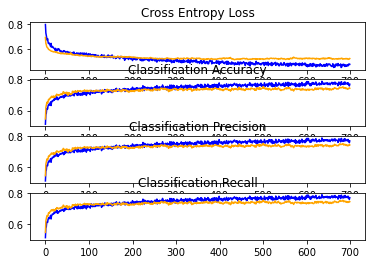

<Figure size 432x288 with 0 Axes>

In [106]:
#plot_hist(hist)
summarize_diagnostics(hist)

In [119]:
test_loss, test_acc, precision,recall = model.evaluate(test_generator)
test_acc

38/38 [==============================] - 8s 202ms/step - loss: 0.5214 - binary_accuracy: 0.7651 - precision: 0.7651 - recall: 0.7651


0.7651006579399109

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
from keras import metrics
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)
true_classes = test_generator.classes

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report) 

38/38 [==============================] - 8s 201ms/step
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 

In [121]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Abnormal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[295  45]
 [ 89 167]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.77      0.87      0.81       340
    Abnormal       0.79      0.65      0.71       256

    accuracy                           0.78       596
   macro avg       0.78      0.76      0.76       596
weighted avg       0.78      0.78      0.77       596



In [122]:
keras.metrics.binary_accuracy(test_generator.classes, y_pred)
y_predprob=model.predict_proba(test_generator)

C:\Users\Mojtaba Jafari Tadi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [123]:
print(y_predprob)

[[0.68270683 0.31729317]
 [0.81988937 0.1801106 ]
 [0.89540654 0.10459347]
 ...
 [0.0275363  0.9724637 ]
 [0.11006532 0.88993466]
 [0.24506798 0.754932  ]]


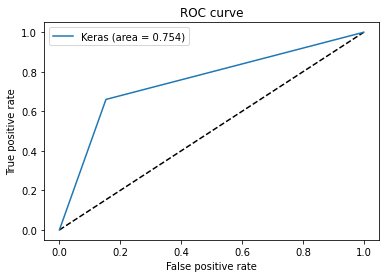

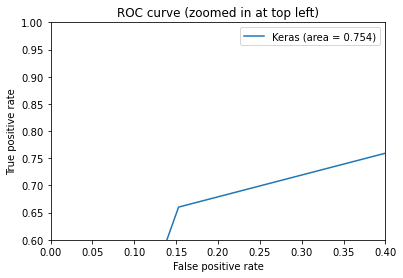

In [124]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, y_predprob.argmax(axis=1))

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
